# <Font color = 'dodgerblue'>**Zero Shot Classification - Brief Overview** </font>

### Introduction to Natural Language Inference (NLI)

Natural Language Inference (NLI) is a task in natural language processing where a model determines the relationship between two sentences, often referred to as the premise and the hypothesis. The relationship might be **entailment (the hypothesis follows from the premise)**, contradiction, or neutrality.

### Zero-Shot Classification Using Hugging Face's Pipeline

Building on NLI, Hugging Face's zero-shot classification leverages entailment (hypotheses follows from the premise) relationships to classify text into various categories.

1. **Premise:** The input text, like a restaurant review.

2. **Labels**:<br>
Possible labels (categories) represent distinct classifications within a given problem. In the context of the review dataset that you will be working with, the possible labels correspond to specific aspects of a dining experience. The labels include: 'food,' referring to the quality and taste of the dishes; 'ambiance,' reflecting the overall atmosphere and decor of the restaurant; 'service,' pertaining to the staff's attentiveness and professionalism; and 'other,' a category that encompasses any additional comments or observations not covered by the aforementioned labels.

3. **Hypothesis Template:**<br>
A specially formatted string that transforms each label into an NLI-style hypothesis. An example of hypothesis template could be **"This example is {}."**. The {} is a placeholder where the candidate label is inserted, allowing the model to consider each label as a potential classification.

3. **Forming Hypotheses using template and labels:**<br>
Based on the label examples and hypothesis template, the resulting hypotheses will be:
   - "This example is food."
   - "This example is ambiance."
   - "This example is service."
   - "This example is other."

4. **Zero-Shot Classification Process:**
   - **Step 1:** Combine premise and hypotheses.
   - **Step 2:** Utilize a pre-trained NLI model to calculate entailment probabilities (probability that hypothesis follows from premise) for each hypothesis.
   - **Step 3:** Return the probabilities for each label.

### Example

Given a review like "The food was excellent," the model might return:
   - food: 0.95
   - ambiance: 0.05
   - service: 0.02
   - other: 0.023

**The probability of 0.95 for the label "food" means that the model has a 95% confidence that the premise "The food was excellent" entails the hypothesis "This example is food."**  The other probabilities represent the model's confidence for the remaining labels.

### Conclusion

Hugging Face's zero-shot classification pipeline calculates probabilities for multiple categories by leveraging NLI concepts. This approach offers flexibility in text analysis without the need for task-specific training, providing insights into the relevance of different labels to a given text.




# <Font color = 'dodgerblue'>**Data and Task Description**

- For this Question, you are provided a csv file (review_sentences.csv) that has 584 sentences from restautant reviews from Yelp. You have to classify the sentences in to four labels: `["food," "ambiance," "service," and "other."]`.
- The csv file is availble in eLearning in 0_Data folder.
- You will use a zero-shot-classification pipleine from huggingface to make predictions.
- You are also provided the actual labels. You will use these labels to access the accuracy of the model.

# <font color = 'indian red'> **Install/Import Modules**

In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install transformers -U -qq
    !pip install sentencepiece -U -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.7 MB/s eta 0:00:00


In [2]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for numerical computing
import numpy as np

# Import the Matplotlib library for creating visualizations such as plots, graphs, etc.
import matplotlib.pyplot as plt

# Import the pathlib library for working with file paths in a way that is cross-platform
from pathlib import Path

# Import functions for metrics computation like confusion matrix, and accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Import the transformers library for state-of-the-art Natural Language Processing (NLP) models like BERT, GPT, etc.
from transformers import pipeline


In [3]:
!pip show transformers

Name: transformers
Version: 4.41.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 


# <font color = 'indian red'>**Specify Base folder for Project**

In [ ]:
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/drive')
  base_folder = Path('/content/drive/MyDrive/data')

# (the else block is required only if you have local GPU machine)
else:
  base_folder = Path('/home/data')



## <Font color = 'dodgerblue'>**Create DataFrame**

In [ ]:
data_folder = base_folder/'datasets/yelp_food_service_ambience'

In [ ]:
# location of train and test files
data_file = data_folder /'review_sentences.csv'

In [ ]:
# creating Pandas Dataframe
train_data = pd.read_csv(data_file, index_col=0, encoding='ISO-8859-1')

In [ ]:
# print shape of the datasets
print(f'Shape of Training data set is : {train_data.shape}')

Shape of Training data set is : (584, 2)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 0 to 599
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         584 non-null    object
 1   final_label  584 non-null    object
dtypes: object(2)
memory usage: 13.7+ KB


In [ ]:
# check first five examples
train_data.head()

,text,final_label
sentences,,
0,"If you love unagi (eel) on rice, you'll absolu...",food
1,But it is definitely worth the wait.,service
3,Sometimes get the Pho w/ rare beef which is de...,food
4,"Other items on this menu was a crab soup, duck...",food
5,I visited the restaurant for lunch and arrived...,other


In [ ]:
# check disytribution of labels
train_data['final_label'].value_counts()

final_label
food        279
other       139
service     120
ambiance     46
Name: count, dtype: int64

## <Font color = 'dodgerblue'>**Load Pipeline**

In [ ]:
# Load zero shot classification pipleine - do not pass any model. We will use the default model
# use pytorch as framework and move the pipleine to GPU
# syntax : zero_shot_classifier = pipeline(name-of-pipeline, framework=, device =)

zero_shot_classifier = pipeline("zero-shot-classification",
                      framework='pt',
                     device = 0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


## <Font color = 'dodgerblue'>**Task1 : Base experiment**.

- **In this Task you will pass all the four labels to the classifier.**

### <Font color = 'dodgerblue'>**Create a list of reviews**

In [ ]:
# create a list of reviews (hint use column.tolist() to convert pandas series to python list)
texts_train = train_data['text'].tolist()
# list of labels
candidate_labels = ['food', 'service', 'ambiance', 'other']

### <Font color = 'dodgerblue'>**Get Probailities**

Pass the list of text and labels you created in the previous step to the classifier to get predictions.

The syntax is : **```probs = zero_shot_classifier(sequences= , candidate_labels =  )```**

In [ ]:
probs = zero_shot_classifier(sequences=texts_train, candidate_labels = candidate_labels )

In [ ]:
probs[0: 3]

[{'sequence': "If you love unagi (eel) on rice, you'll absolutely enjoy their version.",
  'labels': ['food', 'ambiance', 'service', 'other'],
  'scores': [0.9423722624778748,
   0.023495109751820564,
   0.021316828206181526,
   0.012815755791962147]},
 {'sequence': 'But it is definitely worth the wait.',
  'labels': ['other', 'service', 'ambiance', 'food'],
  'scores': [0.4905833303928375,
   0.2534787952899933,
   0.20231029391288757,
   0.053627561777830124]},
 {'sequence': 'Sometimes get the Pho w/ rare beef which is decent.',
  'labels': ['food', 'other', 'service', 'ambiance'],
  'scores': [0.7790170907974243,
   0.10868176817893982,
   0.08358313888311386,
   0.02871805801987648]}]

### <Font color = 'dodgerblue'>**Get Predictions**
- The output from the classifier will give you the probbaility for each label
- The label with the highest probbaility should be your prediction
- You might need to use more than one line of the code to complete this step

In [ ]:
predictions = [item['labels'] [0] for item in probs]

In [ ]:
# get first five preeictions
predictions[0:5]

['food', 'other', 'food', 'food', 'food']

### <Font color = 'dodgerblue'>**Accuracy**
- You might need to use more than one line of the code to complete this step
- Now you have the actual Label and predicted Label for each sentence.
- Calculate the overall acacuracy (Hint : you can use accuracy_score form from sklearn - `from sklearn.metrics import accuracy_score`


In [ ]:
accuracy = 100 *accuracy_score(train_data['final_label'].values, predictions) # CODE HERE
accuracy

66.6095890410959

### <Font color = 'dodgerblue'>**Classification Report**
- Print the classification report
- HINT- `from sklearn.metrics import classification_report`

In [ ]:
# print classification report
class_report = classification_report(train_data['final_label'].values, predictions) # CODE HERE
print(class_report)

              precision    recall  f1-score   support

    ambiance       0.39      0.33      0.36        46
        food       0.76      0.84      0.80       279
       other       0.52      0.54      0.53       139
     service       0.69      0.54      0.61       120

    accuracy                           0.67       584
   macro avg       0.59      0.56      0.57       584
weighted avg       0.66      0.67      0.66       584



###<Font color = 'dodgerblue'>**Conclusion from the classification report** </font>

What do you conclude from the classification report? Write your response below:

### Insights:

1. **Strong Performance in "Food":**
   The model is particularly effective in identifying the "food" category, with the highest precision, recall, and F1-score.

2. **Weak Performance in "Ambiance":**
   The "ambiance" category shows the weakest performance, with the lowest scores in all three metrics.

3. **Moderate Performance in "Other" and "Service":**
   The model has moderate success in classifying the "other" and "service" categories, with F1-scores of 0.53 and 0.61, respectively.


### Conclusions:

The overall perfromnace is good but it can be improved. The model has weakest performance for ambiance. Ambiance often relates to more abstract and nuanced aspects of a restaurant, and it is not surprising that pre-trained model is strugglin in this category.

**Finally, the use of the default hypothesis template, "This example is {}" may lead to bad performance**.  We will change the default hypothesis and see if this helps.

### <Font color = 'dodgerblue'>**Confusion Matrix**
- You might need to use more than one line of the code to complete this step
- Print confusionm matrix
- Hint:use ConfusionMatrixDisplay.from_predictions from sklearn

In [ ]:

label_index = {'food':0, 'service':1, 'ambiance':2, 'other':3}
y_predicted =   np.array([label_index[label] for label in predictions])
y_true = np.array([label_index[label] for label in train_data['final_label'].values])

In [ ]:
confusion_matrix(y_true, y_predicted)

array([[234,   6,   3,  36],
       [ 35,  65,   4,  16],
       [ 13,   1,  15,  17],
       [ 26,  22,  16,  75]])

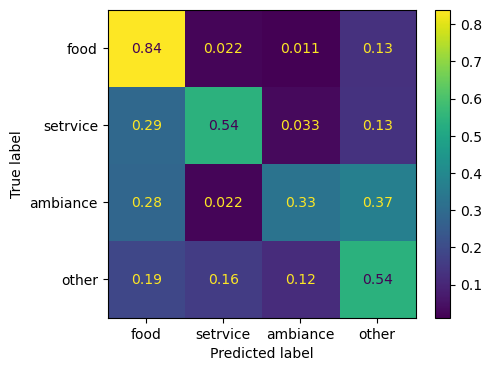

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ConfusionMatrixDisplay.from_predictions(
    y_true=y_true,
    y_pred=y_predicted,
    ax=ax,
    normalize="true",
    display_labels=['food', 'setrvice', 'ambiance', 'other'],
)

###<Font color = 'dodgerblue'>**Conclusions from the Confusion Matrix** </font>

What do you conclude from the Confusion Matrix?
YOUR RESPONSE HERE

Main insights:

1. **"Food" Category:** Most reviews about food are classified correctly, but there's confusion with "other," possibly indicating unclear distinctions in some cases.

2. **"Service" Category:** While many "service" reviews are identified, there's notable confusion with "food" and "other," suggesting that the language used in service reviews might overlap with these categories.

3. **"Ambiance" Category:** The model struggles with "ambiance," often misclassifying it as "food" or "other." This could reflect the ambiguity or subtlety of the language used to describe ambiance in the dataset.

4. **"Other" Category:** The "other" category shows reasonable accuracy but has confusion across all categories, indicating a lack of clear definition or potential overlap with other categories.



## <Font color = 'dodgerblue'>**Task2 : Change hypothesis template**. </font>

In this experiment, we are exploring the impact of changing the hypothesis template in a zero-shot classification model. The default template used in the pipeline is **"This example is {}"**. In the experiment the default template is being replaced with a domain-specific template to classify restaurant reviews into categories like food, service, ambiance, and other.

### Steps:

1. **Modify Hypothesis Template:** Adjust the template to better fit the context of restaurant reviews.
2. **Evaluate Model:** Apply the modified template and report accuracy, a classification report, and confusion matrix.
3. **Compare Results:** Analyze the findings in comparison to the previous experiment using the default template.

### Conclusion:

Changing the hypothesis template may lead to variations in model performance, possibly improving accuracy in certain categories. The comparison between the experiments can reveal insights into how the model interprets premises differently with various templates, helping to tailor the model to specific tasks or domains.

### <Font color = 'dodgerblue'>**Create a list of reviews**

In [ ]:
# create a list of reviews (hint use column.tolist() to convert pandas series to python list)
texts_train = train_data['text'].tolist() # CODE here

# list of labels
candidate_labels = ['food', 'service', 'ambiance', 'other']

### <Font color = 'dodgerblue'>**Get Probbailities**

In the previous experiment, you only passed sequences and candiadte labels. Since you did not pass any hypothesis template, the classifier used the default template "This example is {}." Now, in this experiment, you will introduce a custom hypothesis template to replace the default. The suggested custom template is "This review is related to the restaurant's {}." By specifying a template more aligned with the context of restaurant reviews, you may influence how the classifier interprets the relationship between the premise and each candidate label. Feel free to explore other custom templates that may be suitable for this task, and compare how these changes affect the classification performance.

The syntax is : **```zero_shot_classifier(sequences= , candidate_labels = , hypothesis_template =   )```**

In [ ]:
# pass the sequences, candiadte labels and hypothesis_template to the classifier
template = "This review is related to the restaurant's {}."
probs = zero_shot_classifier(sequences=texts_train,
                             candidate_labels = candidate_labels ,
                             hypothesis_template =template)

In [ ]:
probs[0:3]

[{'sequence': "If you love unagi (eel) on rice, you'll absolutely enjoy their version.",
  'labels': ['food', 'other', 'service', 'ambiance'],
  'scores': [0.8286234140396118,
   0.1660204827785492,
   0.002787330187857151,
   0.0025688130408525467]},
 {'sequence': 'But it is definitely worth the wait.',
  'labels': ['other', 'food', 'service', 'ambiance'],
  'scores': [0.35622066259384155,
   0.3078744113445282,
   0.24831970036029816,
   0.08758516609668732]},
 {'sequence': 'Sometimes get the Pho w/ rare beef which is decent.',
  'labels': ['food', 'other', 'ambiance', 'service'],
  'scores': [0.8090680241584778,
   0.1831628978252411,
   0.0041746641509234905,
   0.003594424109905958]}]

### <Font color = 'dodgerblue'>**Get Predictions**
- The output from the classifier will give you the probbaility for each label
- The label with the highest probbaility should be your prediction
- You might need to use more than one line of the code to complete this step

In [ ]:
predictions = [item['labels'] [0] for item in probs]

In [ ]:
# get first five preeictions
predictions[0:5]

['food', 'other', 'food', 'food', 'other']

### <Font color = 'dodgerblue'>**Accuracy**
- You might need to use more than one line of the code to complete this step
- Now you have the actual Label and predicted Label for each sentence.
- Calculate the overall acacuracy (Hint : you can use accuracy_score form from sklearn - `from sklearn.metrics import accuracy_score`


In [ ]:
accuracy = 100 *accuracy_score(train_data['final_label'].values, predictions) # CODE HERE
accuracy

78.76712328767124

### <Font color = 'dodgerblue'>**Classification Report**
- Print the classification report
- HINT- `from sklearn.metrics import classification_report`

In [ ]:
# print classification report
class_report = classification_report(train_data['final_label'].values, predictions)
print(class_report)

              precision    recall  f1-score   support

    ambiance       0.90      0.41      0.57        46
        food       0.88      0.84      0.86       279
       other       0.60      0.91      0.72       139
     service       0.93      0.68      0.78       120

    accuracy                           0.79       584
   macro avg       0.83      0.71      0.73       584
weighted avg       0.83      0.79      0.79       584



### <Font color = 'dodgerblue'>**Compare the classification report** </font>

Compare the classification report with previous experiment and provide your conclusion.

YOUR RESPONSE HERE

### Comparison:

1. **Ambiance**: The precision has notably increased from 0.39 to 0.90, while the recall is still relatively low, though improved from 0.33 to 0.41.
2. **Food**: Precision has improved from 0.76 to 0.88, and recall is fairly consistent, showing a slight decrease from 0.84 to 0.84.
3. **Other**: A remarkable improvement in both precision (0.52 to 0.60) and recall (0.54 to 0.91), demonstrating better classification in this category.
4. **Service**: Precision improved from 0.69 to 0.93, and recall also increased from 0.54 to 0.68.
5. **Overall Accuracy**: The overall accuracy has increased from 0.67 to 0.79, reflecting the positive effect of the custom template.

### Conclusion:

The change in the hypothesis template from the default "This example is {}" to the more specific "This review is related to the restaurant's {}" appears to have substantially improved the classification results. Most categories have seen increases in both precision and recall, particularly in the 'other' and 'service' labels.

This experiment underscores the importance of crafting a hypothesis template that aligns closely with the context of the data. A carefully chosen template can significantly enhance the model's understanding of the nuances in the data, leading to more accurate and precise classifications.

The comparison between the two experiments indicates that hypothesis templates are not merely syntactic constructs but play a critical role in guiding the model's reasoning process. They can be fine-tuned and adapted to improve performance on specific tasks or domains, making them a valuable tool in zero-shot learning.

### <Font color = 'dodgerblue'>**Confusion Matrix**
- You might need to use more than one line of the code to complete this step
- Print confusionm matrix
- Hint:use ConfusionMatrixDisplay.from_predictions from sklearn

In [ ]:

label_index = {'food':0, 'service':1, 'ambiance':2, 'other':3}
y_predicted =   np.array([label_index[label] for label in predictions])
y_true = np.array([label_index[label] for label in train_data['final_label'].values])

In [ ]:
confusion_matrix(y_true, y_predicted)

array([[234,   2,   0,  43],
       [ 17,  81,   2,  20],
       [  5,   1,  19,  21],
       [ 10,   3,   0, 126]])

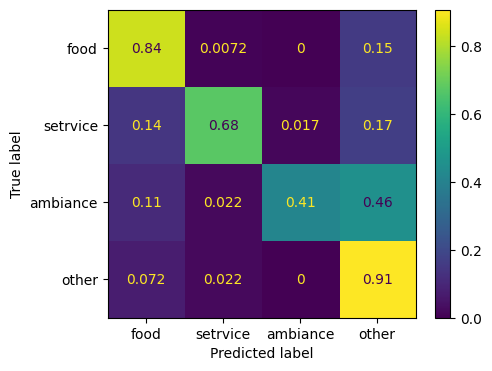

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ConfusionMatrixDisplay.from_predictions(
    y_true=y_true,
    y_pred=y_predicted,
    ax=ax,
    normalize="true",
    display_labels=['food', 'setrvice', 'ambiance', 'other'],
)

###<Font color = 'dodgerblue'>**Conclusions from the Confusion Matrix** </font>

What do you conclude from the Confusion Matrix (compare with previous experiment)?

YOUR RESPONSE HERE

The updated confusion matrix reveals an overall improvement in classification performance across all categories, particularly for the 'other' label. The substantial increase in recall for 'other' indicates that more true positives were identified. However, the lower precision for the 'other' category suggests that many instances from other categories were still classified as 'others.' This indicates that while the new hypothesis template enhanced the handling of 'other,' there is still room for refinement in distinguishing 'other' from the specific categories of 'ambiance,' 'food,' and 'service.' Further fine-tuning of the hypothesis template may lead to even more accurate classification, especially in the handling of the 'other' category.

## <Font color = 'dodgerblue'>**Task3 : Use threshold probbaility to classify Others**.




In this next experiment, you will explore a nuanced approach to classification by **only considering the labels 'food', 'service', and 'ambiance'**. This is a departure from the previous experiments, where you also included 'other' as a label, and it brings some key distinctions:

Unlike traditional classification, where the probabilities across all labels sum to one, in this experiment, you'll assess the probabilities for just the three given labels.

By not including 'other' as a label, you are essentially allowing the model to classify instances into 'other' if none of the given labels strongly apply. If the maximum probability across 'food', 'service', and 'ambiance' is less than the threshold, the instance is classified as 'other'.

This approach not only recognizes that some instances may not fit neatly into one of the specific categories but also aims to refine the handling of those instances. It encourages a more flexible and discerning classification, possibly reducing misclassification.

The task will allow you to explore how this method of classification, guided by a threshold, can impact the model's performance. It offers an insightful comparison with the previous approaches and underlines the significance of understanding the nature of your data, the relationships between categories, and selecting an appropriate classification strategy accordingly.

### <Font color = 'dodgerblue'>**Create a list of reviews**

In [ ]:
# create a list of reviews (hint use column.tolist() to convert pandas series to python list)
texts_train = train_data['text'].tolist() # CODE HERE

# list of labels
candidate_labels = ['food', 'service', 'ambiance'] #  MAKE SURE YOU DO NOT PASS 'other' in candidate labels

### <Font color = 'dodgerblue'>**Get Probbailities**

Pass the list of text and labels you craeted in the previous step to the classifier to get predictions.

In [ ]:
# pass the sequences, candiadte labels and hypothesis_template to the classifier

template = "This review is related to the restaurant's {}."
probs = zero_shot_classifier(sequences=texts_train,
                             candidate_labels = candidate_labels ,
                             hypothesis_template =template) # CODE HERE

In [ ]:
probs[0: 5]

[{'sequence': "If you love unagi (eel) on rice, you'll absolutely enjoy their version.",
  'labels': ['food', 'service', 'ambiance'],
  'scores': [0.9935776591300964,
   0.0033422044944018126,
   0.0030801871325820684]},
 {'sequence': 'But it is definitely worth the wait.',
  'labels': ['food', 'service', 'ambiance'],
  'scores': [0.4782298803329468, 0.38572168350219727, 0.13604843616485596]},
 {'sequence': 'Sometimes get the Pho w/ rare beef which is decent.',
  'labels': ['food', 'ambiance', 'service'],
  'scores': [0.9904888272285461, 0.00511078629642725, 0.004400411155074835]},
 {'sequence': 'Other items on this menu was a crab soup, duck and clams congee, 2 desserts (one chinese and one western) and free appetizers.',
  'labels': ['food', 'service', 'ambiance'],
  'scores': [0.9874481558799744, 0.006339206825941801, 0.006212593987584114]},
 {'sequence': 'I visited the restaurant for lunch and arrived there just after 12.30pm on a Sunday.',
  'labels': ['food', 'ambiance', 'service

### <Font color = 'dodgerblue'>**Get Predictions** </font>

In this experiment , you'll be considering three specific categories: 'food', 'service', 'ambiance', and classify any instance that doesn't fit these categories as 'other'. To make this decision, you will use a concept called a threshold.

#### Understanding the Threshold Concept:
The threshold is a cutoff value that helps determine the class labels based on predicted probabilities. Here's how it works:

Imagine your model predicts the following probabilities for a review:
- 'food': 0.7
- 'service': 0.2
- 'ambiance': 0.1

With a threshold of 0.5, you check whether the highest probability (0.7 for 'food') is greater than this threshold. Since 0.7 > 0.5, the review is classified as 'food'. If the highest probability dees not surpass the threshold, you classify the review as 'other'. By adjusting the threshold, you control how confident the model must be to assign a particular label.

**In this experiment, you will use a theshold of 0.8**

In [ ]:
threshold = 0.8

In [ ]:
predictions = [item['labels'][0] if item['scores'][0] > threshold else 'other' for item in probs] # CODE HERE


In [ ]:
# get first five predictions
predictions[0:5]

['food', 'other', 'food', 'food', 'other']

### <Font color = 'dodgerblue'>**Accuracy**
- You might need to use more than one line of the code to complete this step
- Now you have the True Label and predicted Label for each sentence.
- Calculate the overall acacuracy (Hint : you can use accuracy_score form from sklearn - `from sklearn.metrics import accuracy_score`


In [ ]:
accuracy = 100 *accuracy_score(train_data['final_label'].values, predictions) # CODE HERE
accuracy

76.02739726027397

**The overall accurtacy has decreased. This might be the result of chosen threshold**

### <Font color = 'dodgerblue'>**Classification Report**
- Print the classification report
- HINT- `from sklearn.metrics import classification_report`

In [ ]:
# print classification report
class_report = classification_report(train_data['final_label'].values, predictions) # CODE HERE
print(class_report)

              precision    recall  f1-score   support

    ambiance       0.95      0.41      0.58        46
        food       0.91      0.85      0.88       279
       other       0.53      0.88      0.66       139
     service       0.93      0.53      0.68       120

    accuracy                           0.76       584
   macro avg       0.83      0.67      0.70       584
weighted avg       0.83      0.76      0.76       584



### <Font color = 'dodgerblue'>**Compare the classification report** </font>

Compare the classification report with previous experiment and provide your conclusion.

YOUR RESPONSE HERE

### Precision for Main Categories:
- **With Threshold**: As the threshold is increased, the precision for the main categories ('ambiance', 'food', 'service') increases. This means that the model becomes more confident in assigning these labels, but only when it is highly certain.
- **Without Threshold**: Without setting a specific threshold, the precision may be slightly lower for these categories.

### Overall Accuracy:
- **With Threshold**: Although increasing the threshold enhances precision for the main categories, it doesn't necessarily translate into the best overall accuracy. The stringent threshold may lead to misclassifications in other categories, particularly 'other', where the model may become too conservative in assigning the main labels.

### Conclusion:
The threshold can be viewed as a hyperparameter that needs careful tuning based on the business objective. If the primary goal is to increase precision for specific categories and reduce false positives, a higher threshold might be beneficial. However, this must be balanced against the potential decrease in overall accuracy and the model's ability to classify instances into other relevant categories.

This relationship between the threshold, precision, and overall accuracy highlights the importance of understanding the business context and the specific requirements for the classification task. By considering these factors, one can select an optimal threshold that aligns with the desired outcomes, whether that's maximizing precision for certain labels, achieving high overall accuracy, or finding a balance between these competing objectives.

### <Font color = 'dodgerblue'>**Confusion Matrix**
- You might need to use more than one line of the code to complete this step
- Print confusionm matrix
- Hint:`from sklearn.metrics import confusion_matrix``

In [ ]:

label_index = {'food':0, 'service':1, 'ambiance':2, 'other':3}
y_predicted =   np.array([label_index[label] for label in predictions])
y_true = np.array([label_index[label] for label in train_data['final_label'].values])

In [ ]:
confusion_matrix(y_true, y_predicted)

array([[238,   1,   0,  40],
       [ 10,  64,   0,  46],
       [  3,   0,  19,  24],
       [ 11,   4,   1, 123]])

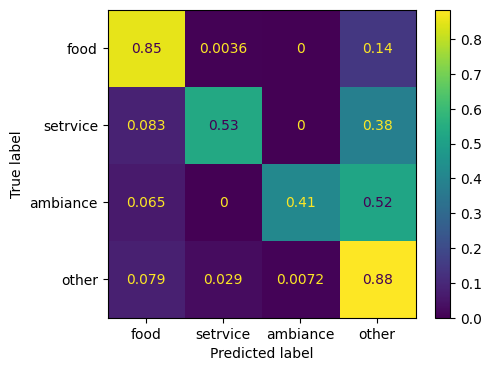

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ConfusionMatrixDisplay.from_predictions(
    y_true=y_true,
    y_pred=y_predicted,
    ax=ax,
    normalize="true",
    display_labels=['food', 'setrvice', 'ambiance', 'other'],
)

###<Font color = 'dodgerblue'>**Conclusions from the Confusion Matrix** </font>

What do you conclude from the Confusion Matrix (compare with previous experiments?

YOUR RESPONSE HERE:

The confusion matrices provided give insight into the behavior of the classifier with and without using a higher threshold of 0.8 for the classification task.

### With Higher Threshold of 0.8:

- True Positives: The main diagonal (from top-left to bottom-right) shows the counts of true positive predictions. The precision for the main categories has increased, evidenced by higher true positives in some categories.
- False Negatives/False Positives: There is an increase in false negatives (misclassifications of the main categories) and false positives (incorrectly classifying other categories as one of the main ones). This is evident in the off-diagonal elements.

### Conclusion:

The decision to set a higher threshold as a hyperparameter depends on the specific trade-offs and business objectives:

- **If maximizing precision for main categories is a priority**, a higher threshold may be suitable. It makes the model more confident in its predictions but could lead to an increase in false negatives, where some instances are missed.

This highlights the complexity of threshold tuning, where a change in one area (e.g., increasing precision for main categories) can lead to unintended consequences in another area (e.g., increase in false negatives). It underscores the necessity to align the threshold selection with the specific goals of the classification task, taking into account both the desired precision and the need for a balanced approach.

## <Font color = 'dodgerblue'>**BONUS TASK (Not Graded) - Function to choose threshold to maximize accuracy**.

Let us assume that our business goal is to maximize accuracy.
Write a function to determine the optimal threshold (maximum accuracy for classification) and to provide predictions that align with that threshold. You will also keep track of accuracy at each threshold level.

#### Pseudo Code:

```plaintext
1. Function predict_labels(probs, actual_labels, thresholds=[0.5]):
2.     Initialize best_threshold = 0
3.     Initialize best_accuracy = 0
4.     Initialize best_predictions = empty list
5.     Initialize accuracy_history = empty list
6.     FOR EACH threshold IN thresholds:
7.         Initialize predictions = empty list
8.         FOR EACH prob IN probs:
9.             Extract max_prob as the highest score among the probabilities in prob['scores']
10.            IF max_prob > current threshold THEN:
11.                Append the corresponding label to predictions (e.g., 'food')
12.            ELSE:
13.                Append 'other' to predictions
14.            END IF
15.        END FOR EACH prob
16.        Calculate accuracy using accuracy_score comparing predictions with actual_labels
17.        Append the accuracy to accuracy_history
18.        IF current accuracy > best_accuracy THEN:
19.            Update best_threshold, best_accuracy, and best_predictions
20.        END IF
21.    END FOR EACH threshold
22.    Return best_threshold, best_predictions and accuracy_history
23. END Function
```

In [ ]:
def predict_labels(probs, actual_labels, thresholds=[0.5]):
    best_threshold = 0
    best_accuracy = 0
    best_predictions = []
    accuracy_history = []

    for threshold in thresholds:
        predictions = []
        for prob in probs:
            max_prob = prob['scores'][0]
            if max_prob > threshold:
                predictions.append(prob['labels'][0])
            else:
                predictions.append('other')

        accuracy = accuracy_score(actual_labels, predictions)
        accuracy_history.append(accuracy)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold
            best_predictions = predictions

    return best_threshold, best_predictions, accuracy_history


### <Font color = 'dodgerblue'>**Get best predictions and threshold**
Use the function to get best_threshold, best_predictions and accuracy_history

In [ ]:
thresholds=np.linspace(0.1, 0.95, 18)
thresholds

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [ ]:
actual_labels = train_data['final_label'].values

In [ ]:
best_threshold, best_predictions, accuracy_history = predict_labels(probs, actual_labels, thresholds) # CODE HERE

In [ ]:
best_threshold

0.6

In [ ]:
best_predictions[0:5]

['food', 'other', 'food', 'food', 'food']

### <Font color = 'dodgerblue'>**Accuracy**
Plot accuracy_history against thresholds


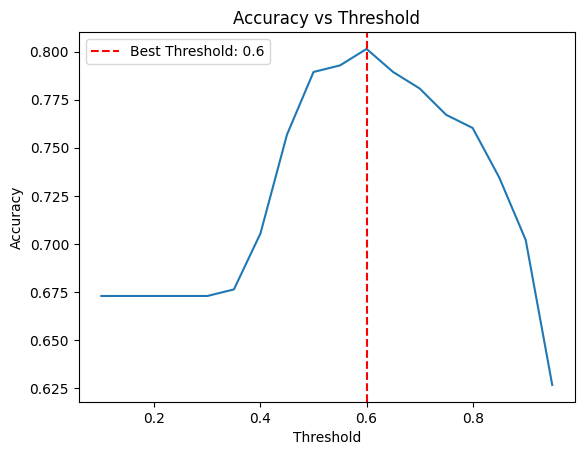

In [ ]:
import matplotlib.pyplot as plt

plt.plot(thresholds, accuracy_history)
plt.title('Accuracy vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold: {best_threshold}')
plt.legend()
plt.show()

In [ ]:
# Best  Accuracy
accuracy = 100 *accuracy_score(train_data['final_label'].values, best_predictions)
accuracy

80.13698630136986

Is the accuracy better than Task 2?

**We can see that accuracy has slightly improved from Task2 (where we passed all four labels)**

### <Font color = 'dodgerblue'>**Confusion Matrix**

In [ ]:

label_index = {'food':0, 'service':1, 'ambiance':2, 'other':3}
y_predicted =   np.array([label_index[label] for label in best_predictions])
y_true = np.array([label_index[label] for label in train_data['final_label'].values])

In [ ]:
confusion_matrix(y_true, y_predicted)

array([[256,   4,   1,  18],
       [ 16,  82,   2,  20],
       [  5,   1,  29,  11],
       [ 25,  11,   2, 101]])

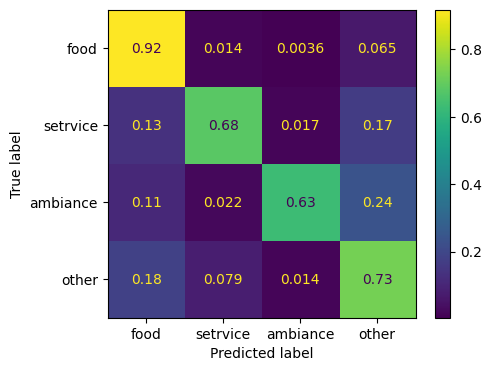

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ConfusionMatrixDisplay.from_predictions(
    y_true=y_true,
    y_pred=y_predicted,
    ax=ax,
    normalize="true",
    display_labels=['food', 'setrvice', 'ambiance', 'other'],
)